You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical

variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
## impute values that are not possible
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    df[i] = df[i].replace(0,df[i].mean())

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
import seaborn as sns

<AxesSubplot: >

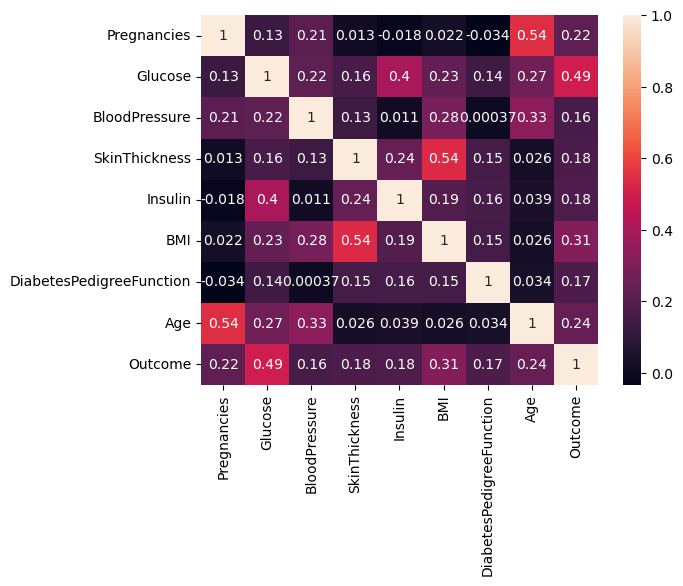

In [13]:
sns.heatmap(data=df.corr(),annot=True)

<AxesSubplot: >

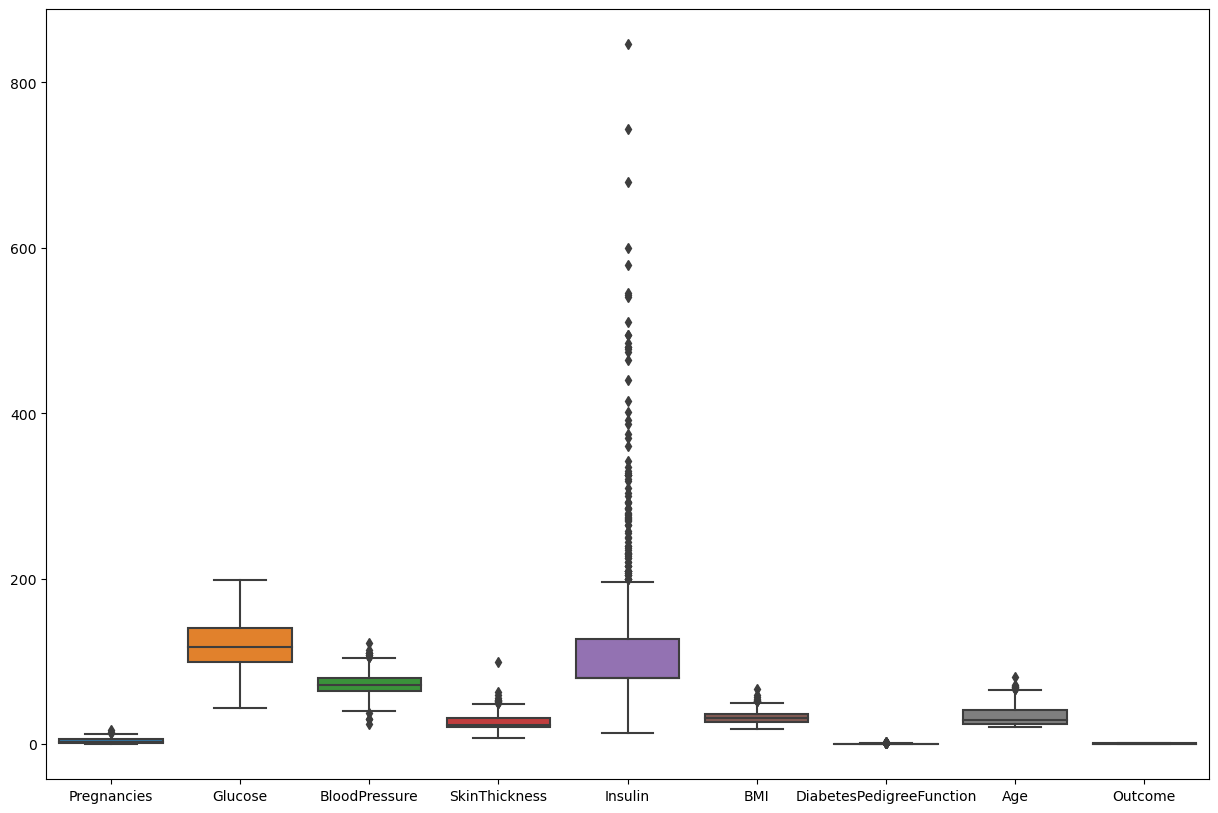

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

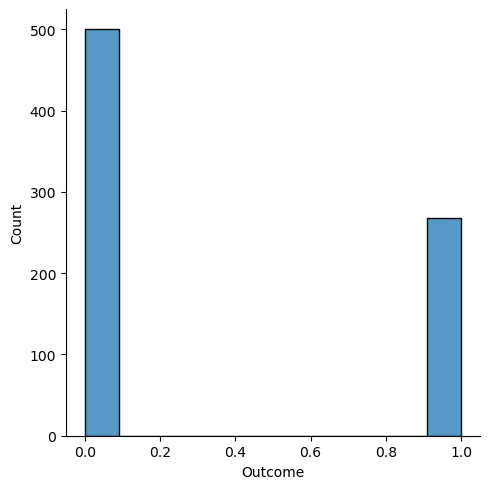

In [15]:
sns.displot(df['Outcome'])

<AxesSubplot: xlabel='Glucose', ylabel='BloodPressure'>

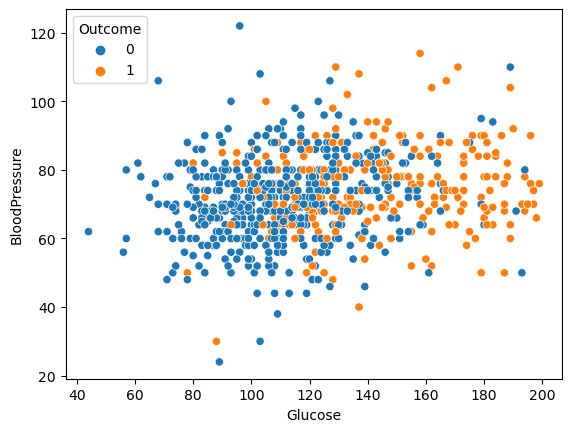

In [16]:
sns.scatterplot(x = 'Glucose',y='BloodPressure',data=df, hue='Outcome')

In [17]:
df.isnull().sum() #no missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Remove outliers**

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()

In [22]:
X_array = scale.fit_transform(x)

In [23]:
X = pd.DataFrame(X_array,columns=x.columns)

In [24]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [25]:
## train test spliting
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.33)

In [27]:
[i.shape for i in [X_train,y_train,y_test]]

[(514, 8), (514,), (254,)]

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
classifier = DecisionTreeClassifier()

In [32]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [35]:
accuracy_score(y_test,y_pred)

0.6889763779527559

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.53      0.67      0.59        86

    accuracy                           0.69       254
   macro avg       0.67      0.69      0.67       254
weighted avg       0.71      0.69      0.70       254



In [37]:
confusion_matrix(y_test,y_pred)

array([[117,  51],
       [ 28,  58]])

In [38]:
## hyper parameter tunning

[Text(0.6255073051948052, 0.9705882352941176, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.3484172077922078, 0.9117647058823529, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.20941558441558442, 0.8529411764705882, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1266233766233766, 0.7941176470588235, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11363636363636363, 0.7352941176470589, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10064935064935066, 0.6764705882352942, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.05194805194805195, 0.6176470588235294, 'x[4] <= 156.0\ngini = 0.037\nsamples = 105\nvalue = [103, 2]'),
 Text(0.025974025974025976, 0.5588235294117647, 'x[3] <= 41.0\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.012987012987012988, 0.5, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.03896103896103896

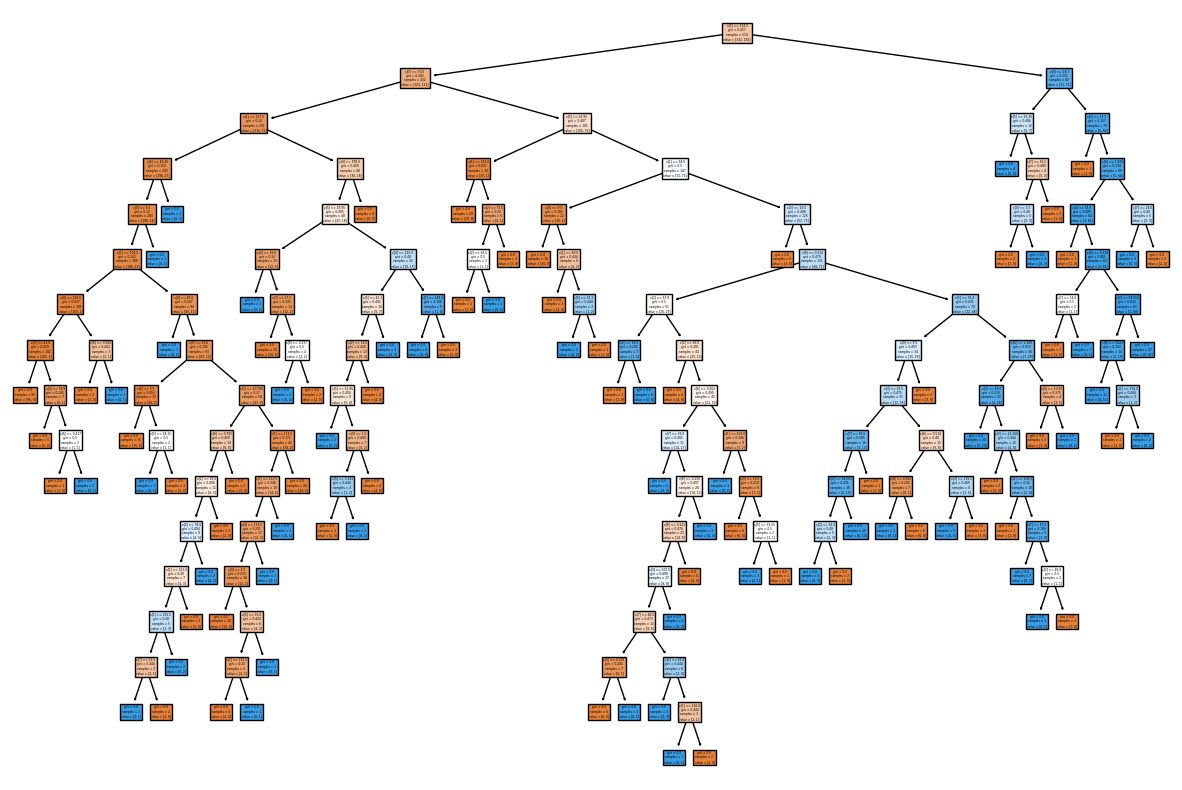

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [43]:
parameters = {
              'criterion' : ['gini','entropy','log_loss'],
               'splitter' : ['best','random'],
                'max_depth' : [1,2,3,4,5],
                'max_features' : ['auto','sqrt','log2']
                  }

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [45]:
tree_classifier = DecisionTreeClassifier()

In [46]:
clf = GridSearchCV(tree_classifier,param_grid=parameters,cv= 5,scoring='accuracy')

In [47]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [49]:
## Now create your model

In [50]:
classifier = DecisionTreeClassifier(max_depth=4,max_features='log2')

In [51]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7125984251968503

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       168
           1       0.57      0.65      0.61        86

    accuracy                           0.71       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.72      0.71      0.72       254



In [55]:
cm = confusion_matrix(y_pred,y_test)

In [57]:
# Compute # Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

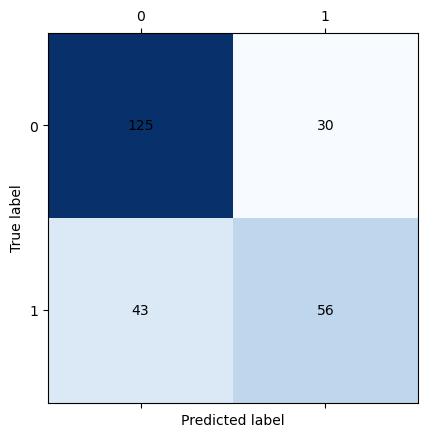

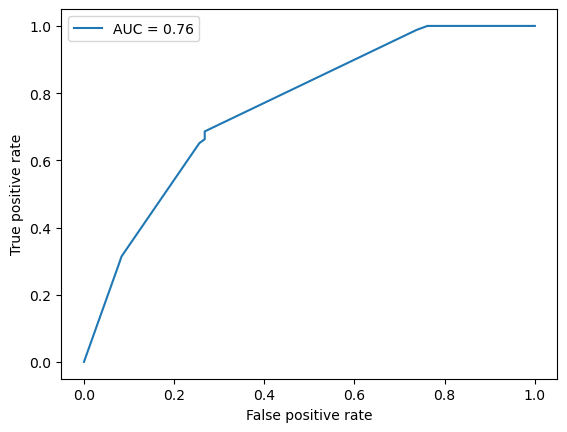

In [58]:
# Plot confusion matrix
fig, ax = plt.subplots()
ax.matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

Ans 6

In order to interpret the decision tree, we need to examine the splits, branches, and leaves. The splits represent the decision criteria for dividing the data into subsets, the branches represent the resulting subsets, and the leaves represent the final predicted classes. The decision tree can provide insights into the relationships between the input features and the predicted class.

In this case, let's assume we have trained a decision tree model on the diabetes dataset. Here's an example of how you could interpret the decision tree:

The decision tree is rooted at the top node, which represents the entire dataset. The root node contains a split on the feature "Glucose" with a threshold of 127.5. The left branch represents samples with "Glucose" values less than or equal to 127.5, while the right branch represents samples with "Glucose" values greater than 127.5.

The left branch is further split based on the "BMI" feature with a threshold of 26.35. Samples with a BMI less than or equal to 26.35 follow the left-most path and are predicted to be negative for diabetes (represented by the leaf node with a value of 0). Samples with a BMI greater than 26.35 follow the middle path and are further split based on the "Age" feature with a threshold of 28.5. Samples with an age less than or equal to 28.5 follow the left-most path and are predicted to be positive for diabetes (represented by the leaf node with a value of 1). Samples with an age greater than 28.5 follow the right-most path and are predicted to be negative for diabetes (represented by the leaf node with a value of 0).

The right branch is further split based on the "BMI" feature with a threshold of 27.45. Samples with a BMI less than or equal to 27.45 follow the left-most path and are predicted to be positive for diabetes (represented by the leaf node with a value of 1). Samples with a BMI greater than 27.45 follow the middle path and are further split based on the "Age" feature with a threshold of 48.5. Samples with an age less than or equal to 48.5 follow the left-most path and are predicted to be positive for diabetes (represented by the leaf node with a value of 1). Samples with an age greater than 48.5 follow the right-most path and are predicted to be negative for diabetes (represented by the leaf node with a value of 0).

Based on this decision tree, we can see that "Glucose" and "BMI" are the most important variables for predicting diabetes, as they are the first and second splits in the tree. The thresholds for these features are 127.5 and 26.35 for "Glucose" and 27.45 for "BMI". Additionally, "Age" is also an important variable for predicting diabetes, as it is the third split in the tree with a threshold of 48.5.

Overall, this decision tree suggests that higher levels of "Glucose" and "BMI" are associated with a higher risk of diabetes, while younger age is associated with a higher risk of diabetes. However, it is important to note that these results should be interpreted with caution, as the decision tree is based on a specific sample of data and may not generalize to other populations. Additionally, other factors not included in the dataset may also play a role in the development of diabetes.

Ans 7

To validate the decision tree model, we can apply it to new data and see how well it performs. This is often done by splitting the dataset into training and testing sets, where the model is trained on the training set and then evaluated on the testing set. We can also use cross-validation techniques to assess the generalization performance of the model.

Additionally, we can test the robustness of the decision tree model to changes in the dataset or environment. This can be done by performing sensitivity analysis and scenario testing.

Sensitivity analysis involves varying the input parameters or model assumptions to see how sensitive the model outputs are to these changes. For example, we could vary the thresholds used in the decision tree or the features used to build the model to see how sensitive the predictions are to these changes. This can help us understand the uncertainty and risks associated with the model and inform us on how robust the model is to changes.

Scenario testing involves testing the decision tree model under different scenarios or conditions to see how well it performs. For example, we could test the model on data from different populations or geographic regions to see how well it generalizes to new settings. We could also test the model under different conditions, such as changes in diet or lifestyle factors, to see how well it performs in different contexts.

Overall, validating the decision tree model is an important step in ensuring its usefulness and reliability. By testing the model on new data and exploring its robustness to changes in the dataset or environment, we can gain a better understanding of its strengths and limitations and identify opportunities for improvement.